In [1]:
import numpy as np
import scipy.stats as stats

%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='alexander-prutko', api_key='VocBkhjfvvSy6zHJ8789')

In [5]:
from scipy.stats import multivariate_normal

In [6]:
# параметры распределений
mu0X, mu0Y, sigma0 = -1., -1., 1.
mu1X, mu1Y, sigma1 = 1., 1., 2.

In [7]:
def sample(d0, d1, n=32):
    x0 = d0(n)
    x1 = d1(n)
    y0 = np.zeros((n, 1))
    y1 = np.ones((n, 1))
    return np.vstack([x0, x1]), np.vstack([y0, y1])   

In [8]:
d0 = lambda n : np.random.normal(loc=[mu0X, mu0Y], scale=[sigma0, sigma0], size = [n,2])
d1 = lambda n : np.random.normal(loc=[mu1X, mu1Y], scale=[sigma1, sigma1], size = [n,2])

In [9]:
nx, ny = (300, 300)
x_ = np.linspace(-10, 10, nx)
y_ = np.linspace(-10, 10, ny)
xv, yv = np.meshgrid(x_, y_)
F0 = multivariate_normal([mu0X, mu0Y], sigma0)
F1 = multivariate_normal([mu1X, mu1Y], sigma1)

grid_list = list(zip(xv.reshape(1,-1).tolist()[0], yv.reshape(1,-1).tolist()[0]))
grid = np.reshape(grid_list, (nx,ny,2))
f0 = F0.pdf(grid)
f1 = F1.pdf(grid)
ratio = f1 / (f1 + f0)

In [10]:
model = keras.Sequential()
# model.add(keras.layers.Dense(10, input_dim=2, kernel_initializer='glorot_normal', activation='relu'))
# model.add(keras.layers.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
model.add(keras.layers.Dense(1, input_dim=2, kernel_initializer='glorot_normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
data = sample(d0, d1, 1000000)
model.fit(x=data[0], y=data[1], batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
2000000/2000000 [==============================] - 22s 11us/step - loss: 0.4418 - acc: 0.8086


In [12]:
pred = model.predict(grid.reshape(-1,2))

In [13]:
dist = pred.reshape(nx, ny)

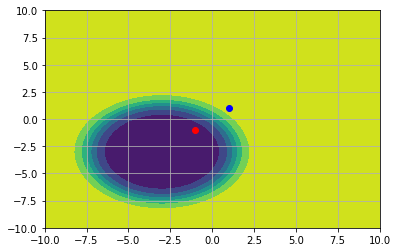

In [14]:
plt.contourf(x_,y_,ratio)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

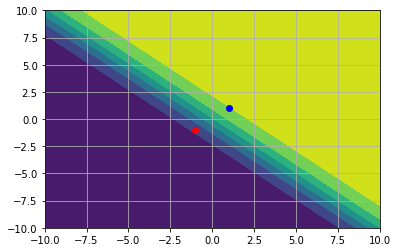

In [15]:
dist = dist.reshape((nx,ny))
h = plt.contourf(x_,y_,dist)
plt.scatter([-1],[-1], c='red')
plt.scatter([1],[1], c='blue')
plt.grid(True)

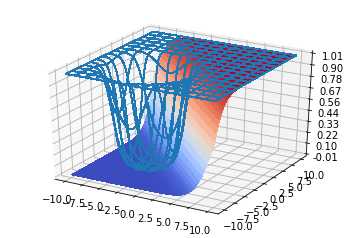

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(xv, yv, dist, cmap=cm.coolwarm, rstride=5, cstride=5,
                       linewidth=0, antialiased=False)
surf = ax.plot_wireframe(xv, yv, ratio, cmap=cm.coolwarm, rstride=20, cstride=20,
                       linewidth=1, antialiased=False)


ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

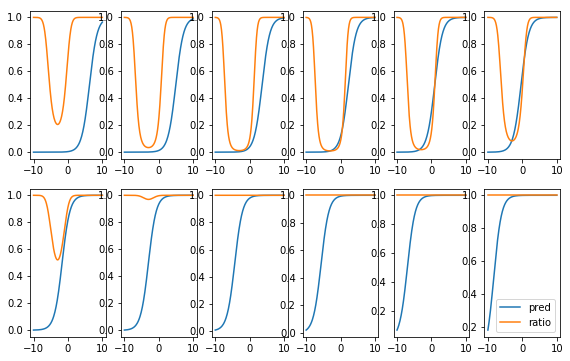

In [17]:
plt.rcParams['figure.figsize'] = [9.5, 6]
yy = 50
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.plot(x_, dist[yy+20*i,:], label='pred')
    plt.plot(x_, ratio[yy+20*i,:], label='ratio')
plt.legend();

In [18]:
data = [go.Surface(z=dist, x=xv, y=yv, opacity=1.00, colorscale='Greens'),
        go.Surface(z=ratio, x=xv, y=yv, opacity=0.8)]

In [19]:
py.iplot(data,filename='plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alexander-prutko/0 or inside your plot.ly account where it is named 'plot'


[plotly plot](https://plot.ly/~alexander-prutko/0)